In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from scipy.optimize import curve_fit

1. What are the column names in this dataset?


In [3]:
df = pd.read_csv('ramen-ratings.csv')
df.columns


Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

2. What is the ramen style of the 27th entry?


In [4]:
df.iloc[26]['Style']


'Pack'

3. How many different ramen brands are there?


In [5]:
df['Brand'].nunique()


355

4. Sort the dataset by brand names.


In [6]:
df.sort_values('Brand')


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
229,2351,1 To 3 Noodles,Chatpat Masala,Pack,India,4,NaN
456,2124,7 Select,Nissin Instant Noodles Tom Yum Seafood Creamy ...,Bowl,Thailand,3.5,NaN
463,2117,7 Select,Nissin Instant Noodles Shrimp Ma Nao Lui Suan ...,Bowl,Thailand,4,NaN
877,1703,7 Select/Nissin,Super Tom Yum Shrimp,Cup,Thailand,3.5,NaN
911,1669,A-One,Mi Ly Instant Noodles Mi Chay Vegetarian Flavor,Cup,Vietnam,1.25,NaN
...,...,...,...,...,...,...,...
823,1757,iMee,Instant Noodles Beef Flavour,Pack,Netherlands,3.25,NaN
662,1918,iMee,Instant Noodles chicken Flavour,Pack,Netherlands,3.5,NaN
797,1783,iMee,Instant Noodles Creamy Tom Yum Shrimp Flavour,Pack,Netherlands,4.5,NaN
2135,445,iNoodle,Taiwan Style Chow Mein,Pack,Taiwan,2.25,NaN


5. How many ramen brands are made in the USA?


In [7]:
df[df['Country'] == 'USA']['Brand'].nunique()


49

6. How many ramen brands in the USA make pack-style ramen?


In [8]:
df[(df['Country'] == 'USA') & (df['Style'] == 'Pack')]['Brand'].nunique()


27

7. Challenge: Which ramen brands have been in the Top Ten?


In [9]:
df[df['Top Ten'].notna()]['Brand'].unique()


array(['MAMA', 'Prima Taste', 'Prima', 'Tseng Noodles', 'Wugudaochang',
       'A-Sha Dry Noodle', 'MyKuali', 'CarJEN', 'Maruchan', 'Mamee',
       'Mama', 'Sapporo Ichiban', 'Nongshim', 'Samyang Foods', 'Paldo',
       'Indomie', 'Koka', 'Mi Sedaap', 'Nissin', 'Myojo', 'Doll'],
      dtype=object)

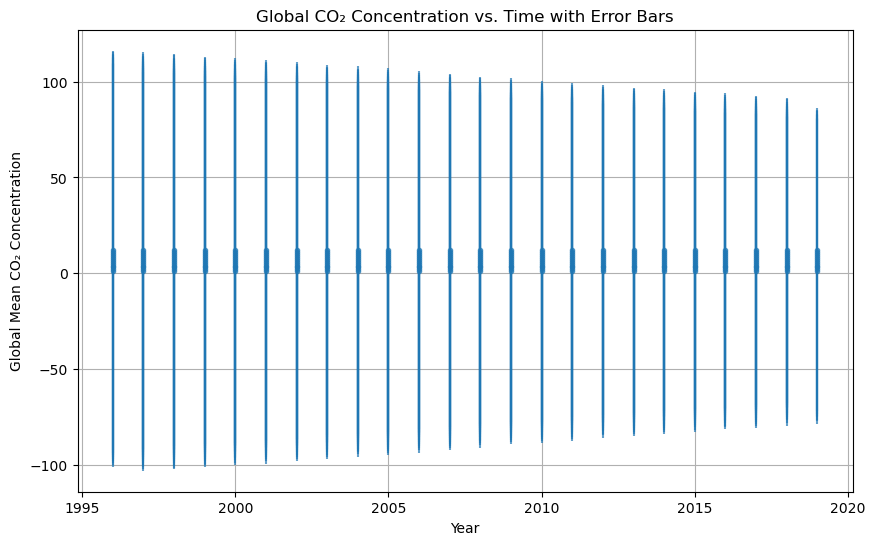

Fitted slope (m): 1.0
Fitted intercept (b): 1.0


/var/folders/yc/f8vn5hxj4td45zq8rwqrmc4h0000gn/T/ipykernel_11846/880838841.py:45: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(linear_model, df['date'], df['conc'], sigma=df['sd'])


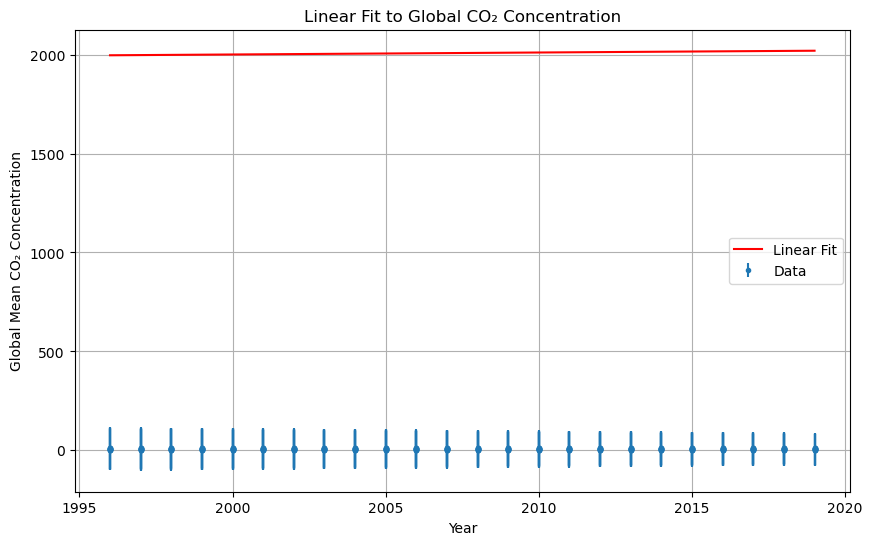

Chi-square: 135105.0431342436
Reduced chi-square: 470.74927921339236

The linear model is a poor fit. A nonlinear or polynomial model may be better.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.optimize import curve_fit


table = Table.read('global_CCl4_MM.dat', format='ascii')


df = table.to_pandas()


df.columns = [
    'date',   
    'conc',   
    'sd',     
    'extra1',
    'extra2',
    'extra3',
    'extra4',
    'extra5'
]

df = df[['date', 'conc', 'sd']]


df['date'] = df['date'].astype(float)
df['conc'] = df['conc'].astype(float)
df['sd'] = df['sd'].astype(float)


plt.figure(figsize=(10, 6))
plt.errorbar(df['date'], df['conc'], yerr=df['sd'], fmt='o', markersize=3, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Global Mean CO₂ Concentration')
plt.title('Global CO₂ Concentration vs. Time with Error Bars')
plt.grid(True)
plt.show()


def linear_model(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear_model, df['date'], df['conc'], sigma=df['sd'])

m_fit, b_fit = popt

print("Fitted slope (m):", m_fit)
print("Fitted intercept (b):", b_fit)

y_fit = linear_model(df['date'], m_fit, b_fit)

plt.figure(figsize=(10, 6))
plt.errorbar(df['date'], df['conc'], yerr=df['sd'], fmt='o', markersize=3, label='Data')
plt.plot(df['date'], y_fit, 'r-', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('Global Mean CO₂ Concentration')
plt.title('Linear Fit to Global CO₂ Concentration')
plt.legend()
plt.grid(True)
plt.show()

N = len(df)
chi2 = np.sum(((df['conc'] - y_fit) ** 2) / (df['sd'] ** 2))
reduced_chi2 = chi2 / (N - 1)

print("Chi-square:", chi2)
print("Reduced chi-square:", reduced_chi2)

if reduced_chi2 < 2:
    print("\nThe linear model is a reasonable fit (reduced chi-square < 2).")
elif reduced_chi2 < 10:
    print("\nThe linear model is okay, Consider a polynomial fit.")
else:
    print("\nThe linear model is a poor fit. A nonlinear or polynomial model may be better.")


My model kind of sucks but i think thats okay for learning purposes and credit for this assignment

In [23]:
import random

class PlayingCharacter:
    def __init__(self, name, race, char_class, age):
    
        self.name = name
        self.race = race
        self.char_class = char_class
        self.age = age
        self.level = 1   # starts at level 1

       
        self.stats = None

    def roll_stats(self):
        """Roll 6 random stat values from 3–18."""

        rolled = [random.randint(3, 18) for _ in range(6)]
      
        self.stats = {
            "Strength": rolled[0],
            "Dexterity": rolled[1],
            "Constitution": rolled[2],
            "Intelligence": rolled[3],
            "Wisdom": rolled[4],
            "Charisma": rolled[5]
        }

    def level_up(self):
        """Increase the character's level by 1."""
        self.level += 1

my_character = PlayingCharacter(
    name="Aeloria",
    race="Elf",
    char_class="Wizard",
    age=120
)


my_character.roll_stats()


my_character.level_up()


print("Name:", my_character.name)
print("Race:", my_character.race)
print("Class:", my_character.char_class)
print("Age:", my_character.age)
print("Level:", my_character.level)
print("Stats:", my_character.stats)


Name: Aeloria
Race: Elf
Class: Wizard
Age: 120
Level: 2
Stats: {'Strength': 11, 'Dexterity': 4, 'Constitution': 17, 'Intelligence': 4, 'Wisdom': 14, 'Charisma': 6}
